In [167]:
#Import libraries
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import squarify as sq
from matplotlib.ticker import PercentFormatter
from fim import arules
from operator import attrgetter
import matplotlib.colors as mcolors
warnings.filterwarnings("ignore")
import matplotlib.ticker as tkr

#Use fivethirtyeight style
plt.style.use('fivethirtyeight')

#Cancel any style and reset matplotlib styles
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [168]:
# Read file

df=pd.read_csv('Groceries_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [169]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [170]:
df["Date"] = pd.to_datetime(df["Date"])

df["Member_number"] = df["Member_number"].apply(str)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


# Market Basket Analysis

In [172]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [174]:
#??arules

In [175]:
# inputs

supp = 2 # minimum support of an assoc. rule (default: 10)
conf = 20 # minimum confidence of an assoc. rule (default: 80%)
report  = 'Sacl'


In [176]:
report_colnames = {
    'a': 'support_itemset_absolute',
    's': 'support_itemset_relative',
    'S': 'support_itemset_relative_pct',
    'b': 'support_bodyset_absolute',
    'x': 'support_bodyset_relative',
    'X': 'support_bodyset_relative_pct',
    'h': 'support_headitem_absolute',
    'y': 'support_headitem_relative',
    'Y': 'support_headitem_relative_pct',
    'c': 'confidence',
    'C': 'confidence_pct',
    'l': 'lift',
    'L': 'lift_pct',
    'e': 'evaluation',
    'E': 'evaluation_pct',
    'Q': 'support of the empty set (total number of transactions)'
    }

In [177]:
cust_prod = df.groupby("Member_number")["itemDescription"].apply(list)
cust_prod

Member_number
1000    [soda, canned beer, sausage, sausage, whole mi...
1001    [frankfurter, frankfurter, beef, sausage, whol...
1002    [tropical fruit, butter milk, butter, frozen v...
1003    [sausage, root vegetables, rolls/buns, deterge...
1004    [other vegetables, pip fruit, root vegetables,...
                              ...                        
4996    [dessert, salty snack, rolls/buns, misc. bever...
4997    [tropical fruit, white wine, whole milk, curd,...
4998                                   [rolls/buns, curd]
4999    [bottled water, butter milk, tropical fruit, b...
5000    [soda, bottled beer, fruit/vegetable juice, ro...
Name: itemDescription, Length: 3898, dtype: object

In [178]:
cust_prod_list = cust_prod.to_list()
cust_prod_list

[['soda',
  'canned beer',
  'sausage',
  'sausage',
  'whole milk',
  'whole milk',
  'pickled vegetables',
  'misc. beverages',
  'semi-finished bread',
  'hygiene articles',
  'yogurt',
  'pastry',
  'salty snack'],
 ['frankfurter',
  'frankfurter',
  'beef',
  'sausage',
  'whole milk',
  'soda',
  'curd',
  'white bread',
  'whole milk',
  'soda',
  'whipped/sour cream',
  'rolls/buns'],
 ['tropical fruit',
  'butter milk',
  'butter',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'whole milk',
  'other vegetables'],
 ['sausage',
  'root vegetables',
  'rolls/buns',
  'detergent',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['other vegetables',
  'pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'chocolate',
  'shopping bags',
  'dish cleaner',
  'packaged fruit/vegetables',
  'tropical fruit',
 

In [182]:
# Run algorithm


apriori = arules(cust_prod_list, supp= supp, conf=conf, report =report)




In [180]:
apriori

[('whole milk', (), 45.81836839404823, 1786, 0.4581836839404823, 1.0),
 ('whole milk',
  ('other vegetables',),
  19.138019497178043,
  746,
  0.5081743869209809,
  1.1091062487222754),
 ('other vegetables',
  ('whole milk',),
  19.138019497178043,
  746,
  0.4176931690929451,
  1.1091062487222754),
 ('other vegetables', (), 37.66033863519754, 1468, 0.3766033863519754, 1.0),
 ('whole milk',
  ('rolls/buns',),
  17.855310415597742,
  696,
  0.5106382978723404,
  1.1144838102499344),
 ('rolls/buns',
  ('whole milk',),
  17.855310415597742,
  696,
  0.3896976483762598,
  1.1144838102499344),
 ('whole milk',
  ('rolls/buns', 'other vegetables'),
  8.209338122113904,
  320,
  0.5594405594405595,
  1.2209962489917696),
 ('other vegetables',
  ('rolls/buns', 'whole milk'),
  8.209338122113904,
  320,
  0.45977011494252873,
  1.2208337248269598),
 ('rolls/buns',
  ('other vegetables', 'whole milk'),
  8.209338122113904,
  320,
  0.4289544235924933,
  1.2267530030546874),
 ('other vegetables',


In [184]:
# Create dataframe



colnames=["Cons_Product","antecedent"] + [report_colnames.get(k,k) for k in list(report)]
df_rules = pd.DataFrame(apriori, columns=colnames)
df_rules = df_rules.sort_values(report_colnames["a"], ascending=False)



# Change order of antecedent and consequent

df_rules = df_rules[["antecedent" , "Cons_Product"] + [report_colnames.get(k,k) for k in list(report)]]

print(df_rules.shape)


df_rules.head(50)


(12399, 6)


,antecedent,Cons_Product,support_itemset_relative_pct,support_itemset_absolute,confidence,lift
0,(),whole milk,45.818368,1786,0.458184,1.000000
3,(),other vegetables,37.660339,1468,0.376603,1.000000
11,(),rolls/buns,34.966650,1363,0.349666,1.000000
31,(),soda,31.349410,1222,0.313494,1.000000
79,(),yogurt,28.296562,1103,0.282966,1.000000
314,(),tropical fruit,23.370959,911,0.233710,1.000000
169,(),root vegetables,23.063109,899,0.230631,1.000000
537,(),bottled water,21.369933,833,0.213699,1.000000
860,(),sausage,20.600308,803,0.206003,1.000000
2,"(whole milk,)",other vegetables,19.138019,746,0.417693,1.109106


# Cohort Analysis

In [185]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [186]:
df["Date"].max()

Timestamp('2015-12-30 00:00:00')

In [188]:
df["Date"].min()

Timestamp('2014-01-01 00:00:00')

In [ ]:
# Focus only in tow last months

In [190]:
df2 = df[df["Date"] >= '2015-11-01']
df2

,Member_number,Date,itemDescription
3,1187,2015-12-12,other vegetables
7,3803,2015-12-23,pot plants
9,4119,2015-12-02,tropical fruit
21,2867,2015-12-11,whole milk
23,1088,2015-11-30,tropical fruit
...,...,...,...
37103,2168,2015-11-25,waffles
37104,1503,2015-12-05,dishes
37115,4656,2015-12-25,newspapers
37116,2741,2015-11-09,canned vegetables


In [191]:
# Create cohorts and set the examine period


df2["order_week"] =df2["Date"].dt.to_period("W")



In [192]:
df2["cohort"] = df2.groupby("Member_number")["Date"].transform("min").dt.to_period("W")
df2

,Member_number,Date,itemDescription,order_week,cohort
3,1187,2015-12-12,other vegetables,2015-12-07/2015-12-13,2015-12-07/2015-12-13
7,3803,2015-12-23,pot plants,2015-12-21/2015-12-27,2015-12-14/2015-12-20
9,4119,2015-12-02,tropical fruit,2015-11-30/2015-12-06,2015-11-30/2015-12-06
21,2867,2015-12-11,whole milk,2015-12-07/2015-12-13,2015-12-07/2015-12-13
23,1088,2015-11-30,tropical fruit,2015-11-30/2015-12-06,2015-11-30/2015-12-06
...,...,...,...,...,...
37103,2168,2015-11-25,waffles,2015-11-23/2015-11-29,2015-11-23/2015-11-29
37104,1503,2015-12-05,dishes,2015-11-30/2015-12-06,2015-11-30/2015-12-06
37115,4656,2015-12-25,newspapers,2015-12-21/2015-12-27,2015-12-21/2015-12-27
37116,2741,2015-11-09,canned vegetables,2015-11-09/2015-11-15,2015-11-09/2015-11-15


In [194]:
# Aggregate Data per cohort



df_cohort = df2.groupby(["cohort", "order_week"]).agg(n_customers =("Member_number",
                                                                    "nunique")).reset_index(drop=False)

In [195]:
df_cohort["period_number"] = (df_cohort.order_week - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,order_week,n_customers,period_number
0,2015-10-26/2015-11-01,2015-10-26/2015-11-01,24,0
1,2015-10-26/2015-11-01,2015-11-02/2015-11-08,1,1
2,2015-10-26/2015-11-01,2015-11-09/2015-11-15,1,2
3,2015-10-26/2015-11-01,2015-11-23/2015-11-29,1,4
4,2015-11-02/2015-11-08,2015-11-02/2015-11-08,133,0
5,2015-11-02/2015-11-08,2015-11-09/2015-11-15,2,1
6,2015-11-02/2015-11-08,2015-11-16/2015-11-22,6,2
7,2015-11-02/2015-11-08,2015-11-23/2015-11-29,3,3
8,2015-11-02/2015-11-08,2015-11-30/2015-12-06,2,4
9,2015-11-02/2015-11-08,2015-12-07/2015-12-13,5,5


In [196]:
# Create pivot table



cohort_pivot = df_cohort.pivot_table(index = "cohort",
                                    columns = "period_number",
                                    values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7
cohort,,,,,,,,
2015-10-26/2015-11-01,24.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN
2015-11-02/2015-11-08,133.0,2.0,6.0,3.0,2.0,5.0,3.0,1.0
2015-11-09/2015-11-15,133.0,8.0,5.0,4.0,2.0,3.0,5.0,3.0
2015-11-16/2015-11-22,116.0,4.0,1.0,4.0,1.0,3.0,1.0,NaN
2015-11-23/2015-11-29,145.0,4.0,4.0,3.0,3.0,1.0,NaN,NaN
2015-11-30/2015-12-06,112.0,5.0,5.0,4.0,NaN,NaN,NaN,NaN
2015-12-07/2015-12-13,95.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN
2015-12-14/2015-12-20,109.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2015-12-21/2015-12-27,98.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [198]:
cohort_size

cohort
2015-10-26/2015-11-01     24.0
2015-11-02/2015-11-08    133.0
2015-11-09/2015-11-15    133.0
2015-11-16/2015-11-22    116.0
2015-11-23/2015-11-29    145.0
2015-11-30/2015-12-06    112.0
2015-12-07/2015-12-13     95.0
2015-12-14/2015-12-20    109.0
2015-12-21/2015-12-27     98.0
2015-12-28/2016-01-03     51.0
Freq: W-SUN, Name: 0, dtype: float64

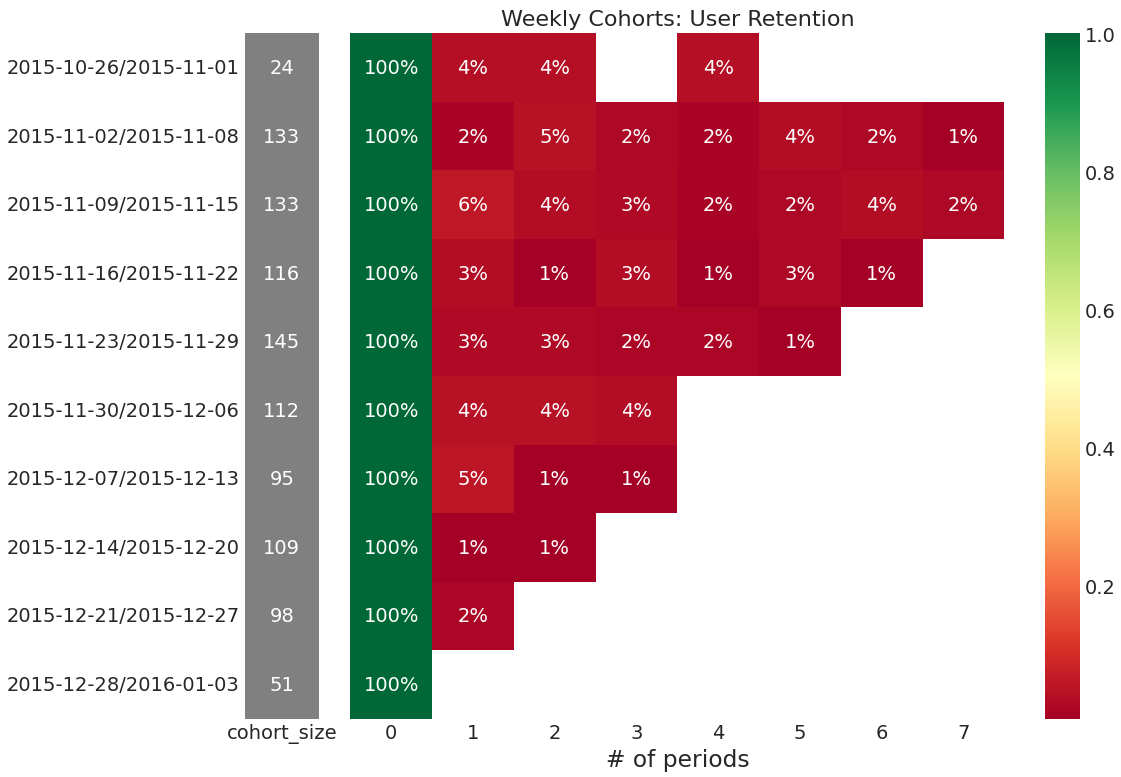

In [199]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Weekly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['grey'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()